In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import src.bayesian_stats as bst

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.2.2


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95

In [3]:
df_n30 = pd.read_csv('../kruschke_data/HtWtData30.csv')
df_n30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    30 non-null     int64  
 1   height  30 non-null     float64
 2   weight  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
df_n30.head()

,male,height,weight
0,0,64.0,136.4
1,0,62.3,215.1
2,1,67.9,173.6
3,0,64.2,117.3
4,0,64.8,123.3


In [5]:
# Standardize the data
zheight, mu_h, sigma_h = bst.standardize(df_n30.height)
zy, mu_y, sigma_y = bst.standardize(df_n30.weight)

In [6]:
model, idata = bst.robust_linear_regression(zheight, zy)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, sigma, nu_minus_one]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


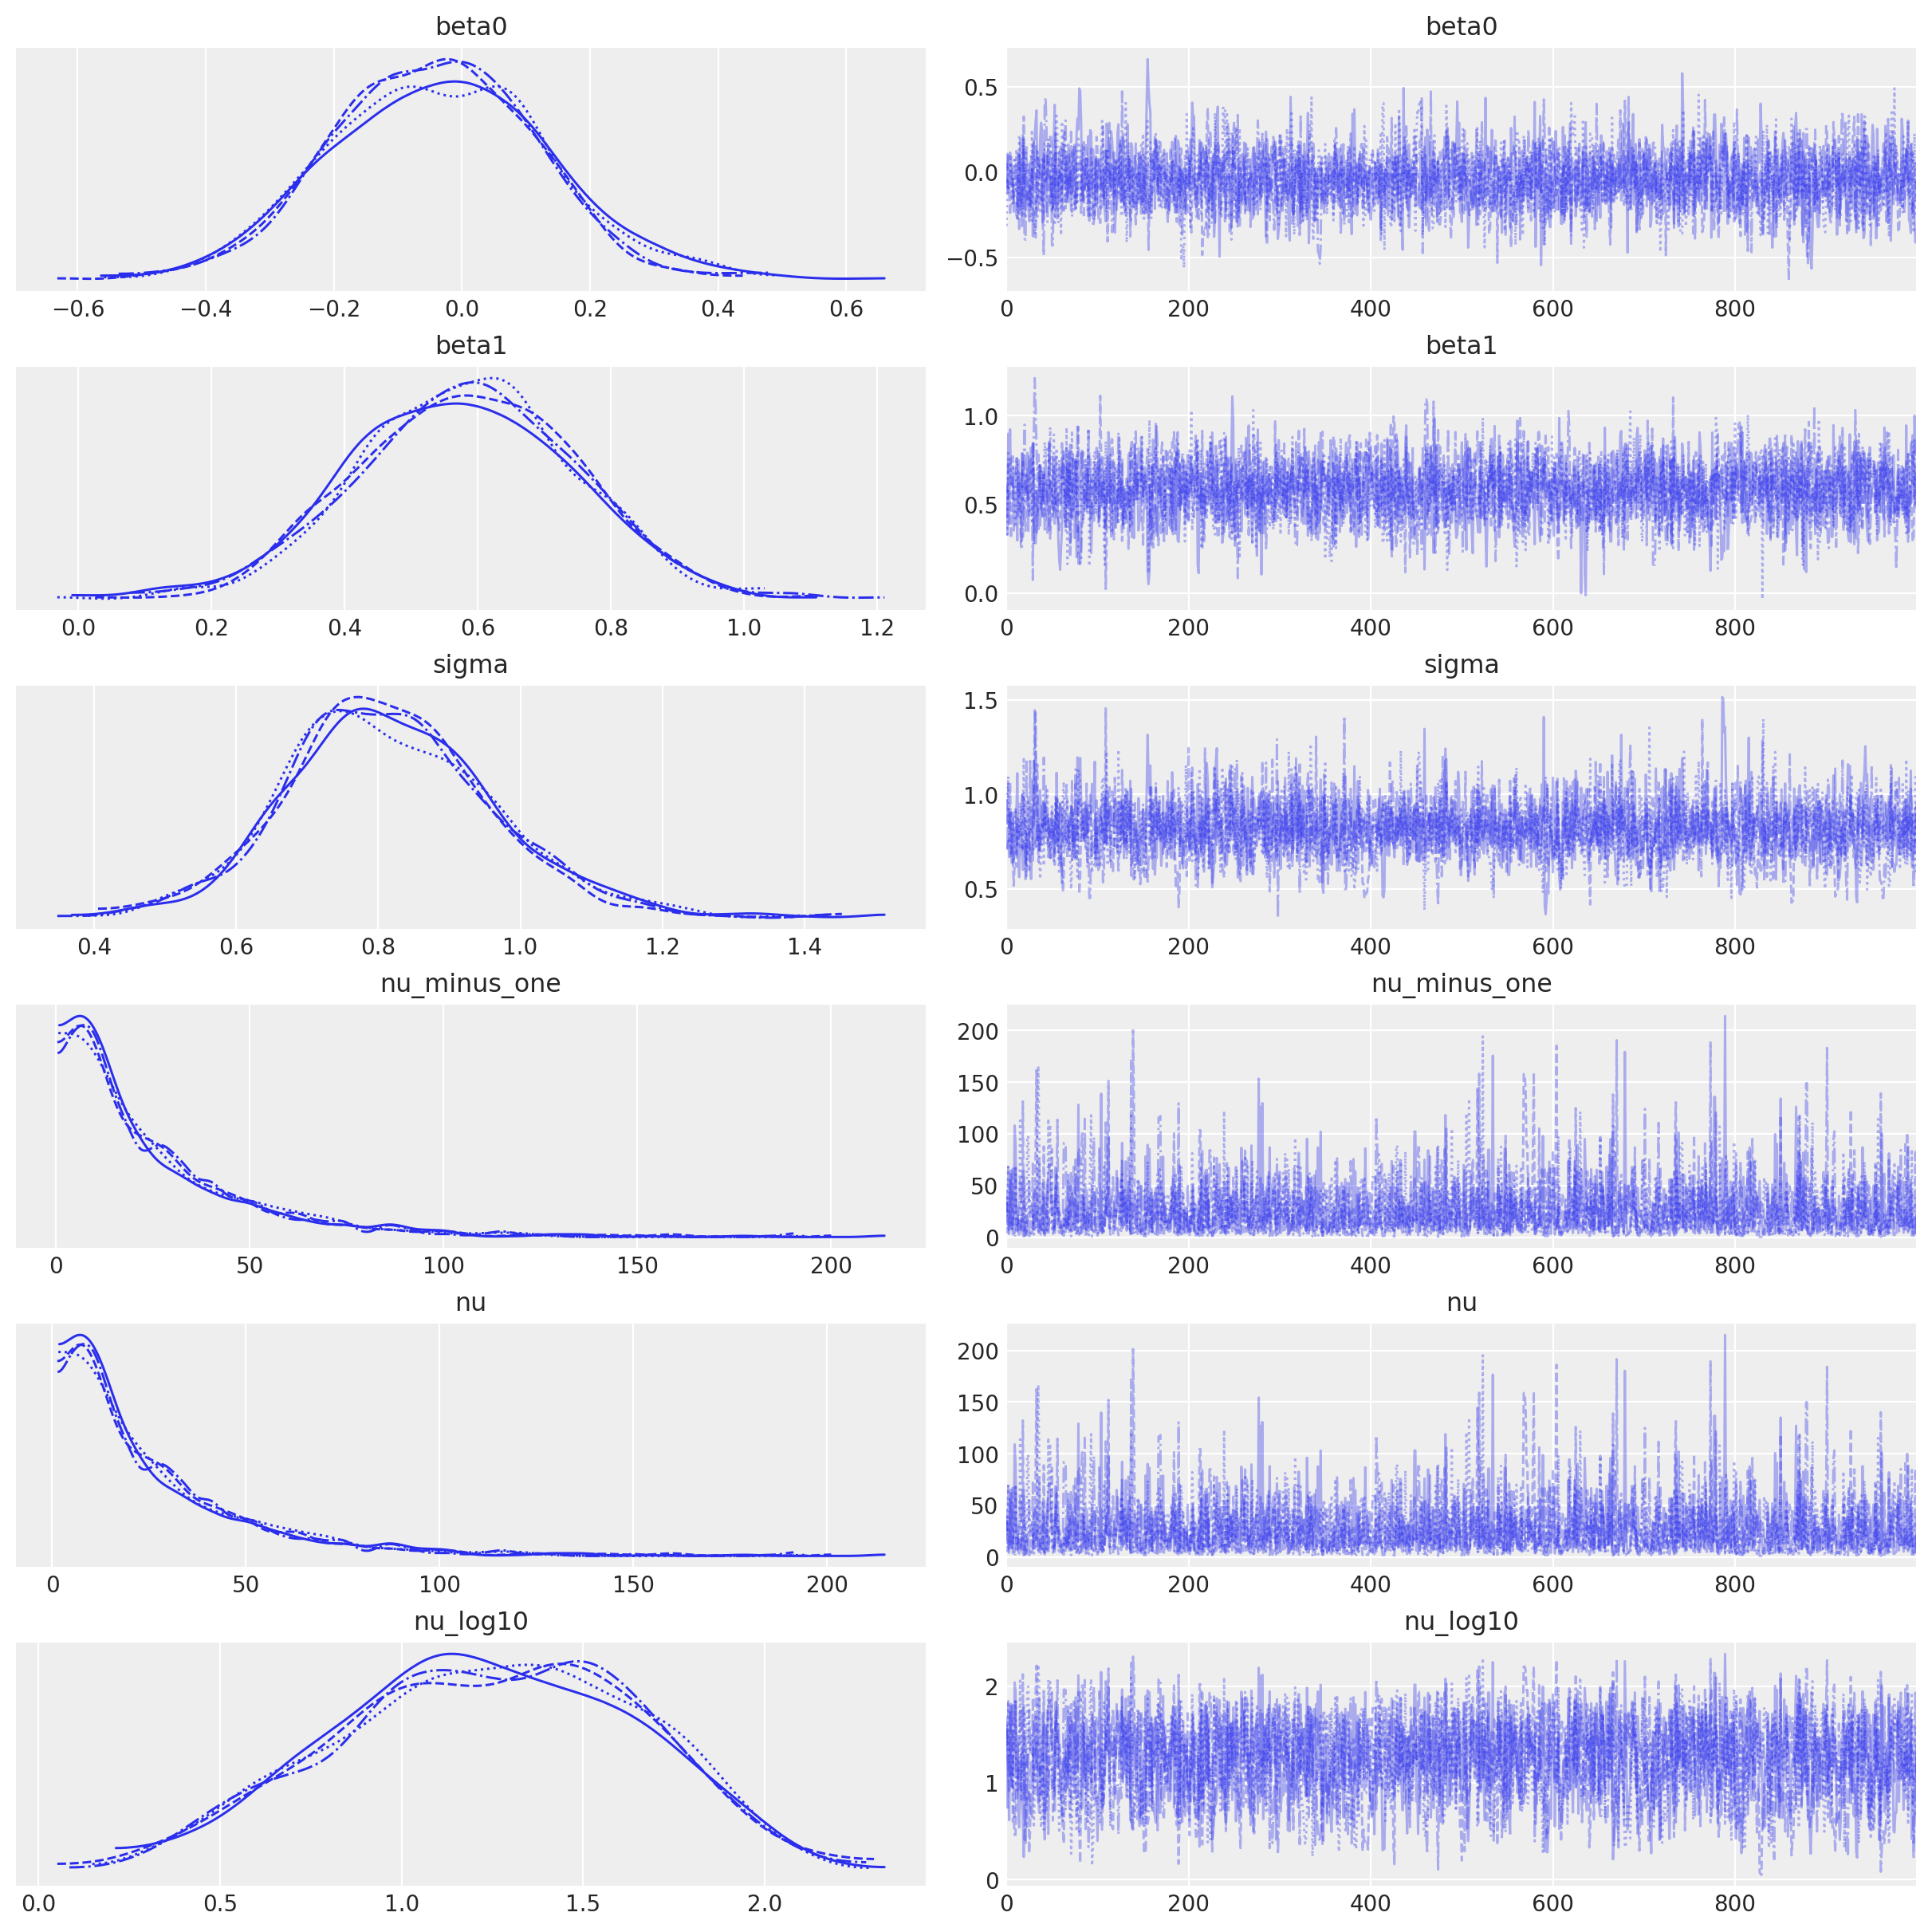

In [7]:
pm.plot_trace(idata);

In [8]:
post = idata.posterior
post

<xarray.Dataset>
Dimensions:       (chain: 4, draw: 1000)
Coordinates:
  * chain         (chain) int64 0 1 2 3
  * draw          (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    beta0         (chain, draw) float64 -0.1218 -0.1181 ... -0.04192 -0.08543
    beta1         (chain, draw) float64 0.5296 0.3321 0.8989 ... 0.4987 0.7406
    sigma         (chain, draw) float64 0.9674 0.8453 0.9248 ... 0.7554 0.8741
    nu_minus_one  (chain, draw) float64 38.48 18.41 11.86 ... 2.763 5.231 16.09
    nu            (chain, draw) float64 39.48 19.41 12.86 ... 3.763 6.231 17.09
    nu_log10      (chain, draw) float64 1.596 1.288 1.109 ... 0.7946 1.233
Attributes:
    created_at:                 2022-11-05T19:18:15.148269
    arviz_version:              0.13.0
    inference_library:          pymc
    inference_library_version:  4.2.2
    sampling_time:              17.462816953659058
    tuning_steps:               1000

In [9]:
stacked = az.extract(post)

In [10]:
stacked["beta0_r"], stacked["beta_r"], stacked["sigma_r"] = bst.unstandardize_linreg_parameters(stacked["beta0"], stacked["beta1"], mu_h, mu_y, stacked["sigma"], sigma_h, sigma_y)

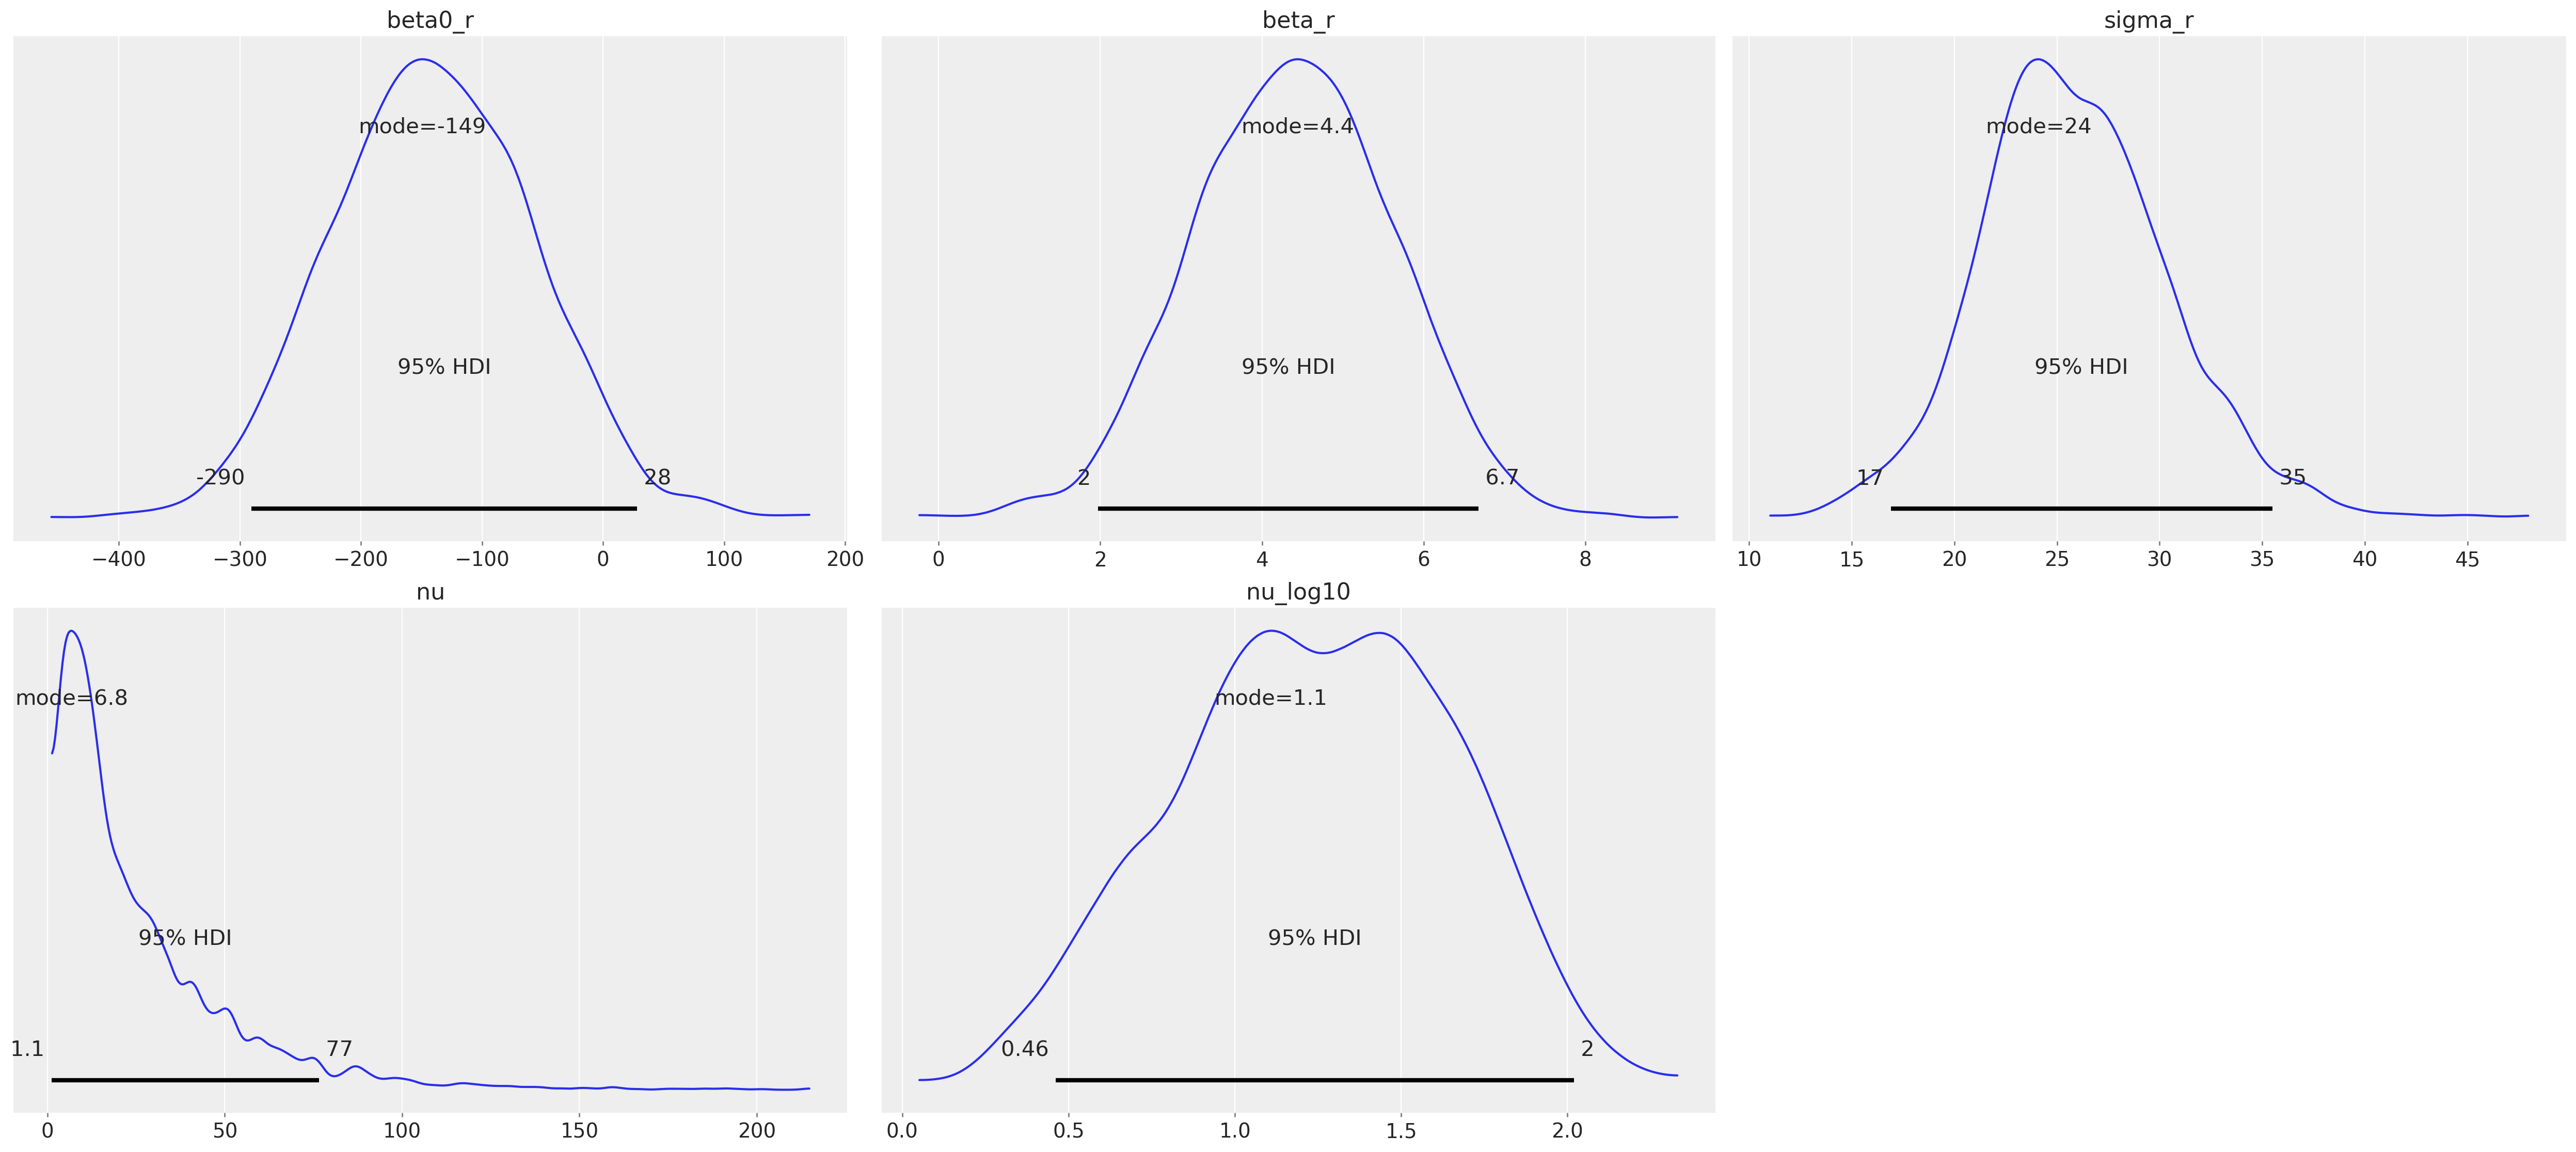

In [11]:
az.plot_posterior(stacked, combine_dims={"sample"}, var_names=["beta0_r", "beta_r", "sigma_r", "nu", "nu_log10"], point_estimate="mode");